In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("Monthly_data_cmo.csv")
df2 = pd.read_csv("CMO_MSP_Mandi.csv")


print(df2.head())

         commodity  year          Type  msprice  msp_filter
0   PADDY-UNHUSKED  2012  Kharif Crops   1250.0           1
1  RICE(PADDY-HUS)  2012  Kharif Crops   1280.0           1
2     Jowar_Hybrid  2012  Kharif Crops   1500.0           1
3    SORGUM(JAWAR)  2012  Kharif Crops   1520.0           1
4            BAJRI  2012  Kharif Crops   1175.0           1


In [3]:
print(df1.head())

         APMC      Commodity  Year  Month  arrivals_in_qtl  min_price  \
0  Ahmednagar          Bajri  2015  April               79       1406   
1  Ahmednagar          Bajri  2016  April              106       1788   
2  Ahmednagar  Wheat(Husked)  2015  April             1253       1572   
3  Ahmednagar  Wheat(Husked)  2016  April              387       1750   
4  Ahmednagar  Sorgum(Jawar)  2015  April             3825       1600   

   max_price  modal_price     date district_name   state_name  
0       1538         1463  2015-04    Ahmadnagar  Maharashtra  
1       1925         1875  2016-04    Ahmadnagar  Maharashtra  
2       1890         1731  2015-04    Ahmadnagar  Maharashtra  
3       2220         1999  2016-04    Ahmadnagar  Maharashtra  
4       2200         1900  2015-04    Ahmadnagar  Maharashtra  


In [4]:
df2.describe()

,year,msprice,msp_filter
count,155.000000,145.000000,155.0
mean,2014.000000,2822.448276,1.0
std,1.418798,1441.725928,0.0
min,2012.000000,170.000000,1.0
25%,2013.000000,1470.000000,1.0
50%,2014.000000,2970.000000,1.0
75%,2015.000000,4000.000000,1.0
max,2016.000000,6240.000000,1.0


In [5]:
df1.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [6]:
df1.describe(include=['object'])

,APMC,Commodity,Month,date,district_name,state_name
count,62429,62429,62429,62429,62429,62429
unique,349,352,12,27,33,1
top,Mumbai,Gram,November,2016-01,Pune,Maharashtra
freq,1538,3972,7183,2769,6366,62429


In [7]:
df1['date'] =  pd.to_datetime(df1['date'])
df1['Commodity']=df1['Commodity'].str.lower()
df1['Commodity'] = df1['Commodity'].str.replace('bhagar/vari','bhagar-vari')
df1['Commodity'] = df1['Commodity'].str.replace('thymol/lovage','thymol-lovage')
df2['commodity']=df2['commodity'].str.lower()

In [8]:
df2.describe()

,year,msprice,msp_filter
count,155.000000,145.000000,155.0
mean,2014.000000,2822.448276,1.0
std,1.418798,1441.725928,0.0
min,2012.000000,170.000000,1.0
25%,2013.000000,1470.000000,1.0
50%,2014.000000,2970.000000,1.0
75%,2015.000000,4000.000000,1.0
max,2016.000000,6240.000000,1.0


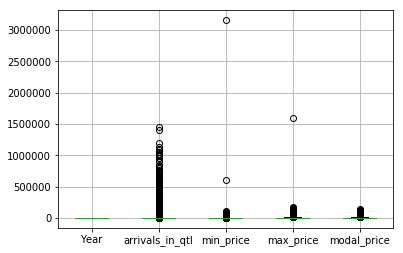

In [9]:
boxplot = df1.boxplot()

In [10]:
# Removing outliers manually 
df1 = df1.drop(df1[(df1['min_price']>500000)].index).reset_index(drop=True)

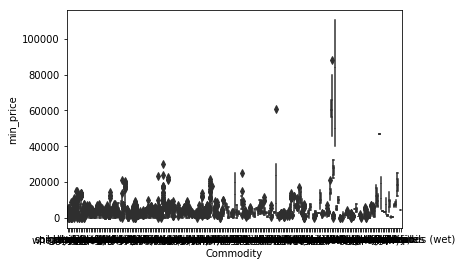

In [11]:
bplot = sns.boxplot(y='min_price', x='Commodity', 
                 data=df1, 
                 width=0.5,
                 palette="colorblind")

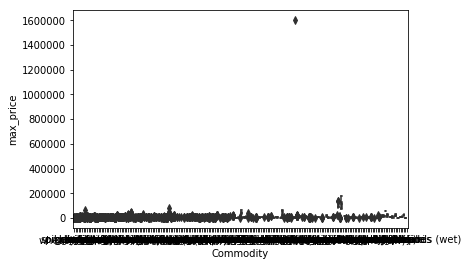

In [12]:
bplot = sns.boxplot(y='max_price', x='Commodity', 
                 data=df1, 
                 width=0.5,
                 palette="colorblind")

In [13]:
df1 = df1.drop(df1[(df1['max_price']>200000)].index).reset_index(drop=True)
df1=df1[(df1['min_price']<=df1['max_price']) & (df1['modal_price'] <= df1['max_price'])]
df1=df1[(df1['max_price']>0) & (df1['modal_price']>0) & (df1['max_price']<=1000000)]

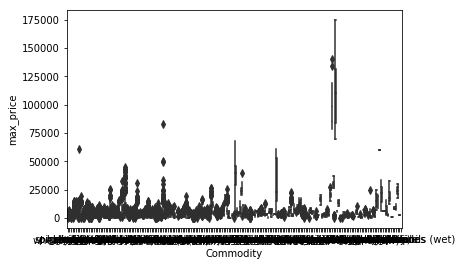

In [14]:
bplot = sns.boxplot(y='max_price', x='Commodity', 
                 data=df1, 
                 width=0.5,
                 palette="colorblind")

In [15]:
# clustering data based on APMC and commodity
commodity=df1.Commodity.unique()
apmc=df1.APMC.unique()
n=commodity.size
m=apmc.size
test={}
A=pd.DataFrame(columns=['Key','Commodity','APMC'])
q=0
for i in range(0,n):
  for j in range(0,m):
    if df1[(df1['APMC'] == apmc[j]) & (df1['Commodity'] == commodity[i])].empty:
        continue
    else:
        test[q]=df1[(df1['APMC'] == apmc[j]) & (df1['Commodity'] == commodity[i])]
        test[q]= pd.merge(test[q], df2, how='left',left_on=['Commodity','Year'], right_on=['commodity','year']).set_index('date')
        A.loc[q]=([q, commodity[i], apmc[j]])
        q+=1

In [17]:
print(test[0])

                  APMC Commodity  Year      Month  arrivals_in_qtl  min_price  \
date                                                                            
2015-04-01  Ahmednagar     bajri  2015      April               79       1406   
2016-04-01  Ahmednagar     bajri  2016      April              106       1788   
2015-08-01  Ahmednagar     bajri  2015     August               24       1615   
2016-08-01  Ahmednagar     bajri  2016     August               24       1733   
2015-12-01  Ahmednagar     bajri  2015   December              258       1616   
2015-02-01  Ahmednagar     bajri  2015   February               10       1500   
2016-02-01  Ahmednagar     bajri  2016   February               96       1645   
2015-01-01  Ahmednagar     bajri  2015    January               97       1472   
2016-01-01  Ahmednagar     bajri  2016    January              377       1522   
2015-07-01  Ahmednagar     bajri  2015       July              213       1503   
2015-06-01  Ahmednagar     b

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
for key in test.keys():
    if test[key]['modal_price'].size >2:
        print(test[key]['modal_price'])
        result = seasonal_decompose(test[key]['modal_price'], model='multiplicative', freq=2)
        if np.mean(result.seasonal) == 0:
            test[key]['seasonality']='multiplicative'
            test[key]['deseasonal']=result.trend
            test[key]['Peak seasonal price fluctuation %']=max(((test[key]['modal_price'].max()-test[key]['modal_price'].mean())*100)/test[key]['modal_price'].mean(),((test[key]['modal_price'].mean()-test[key]['modal_price'].min())*100)/test[key]['modal_price'].mean())
        else:
            result = seasonal_decompose(test[key]['modal_price'], model='additive', freq=2)
            if np.mean(result.seasonal) == 0:
                test[key]['seasonality']='additive'
                test[key]['deseasonal']=result.trend
                test[key]['Peak seasonal price fluctuation %']=max(((test[key]['modal_price'].max()-test[key]['modal_price'].mean())*100)/test[key]['modal_price'].mean(),((test[key]['modal_price'].mean()-test[key]['modal_price'].min())*100)/test[key]['modal_price'].mean())
            else:
                test[key]['seasonality']='not found'
                test[key]['deseasonal']=np.nan
    else:
        test[key]['seasonality']='not found'
        test[key]['deseasonal']=np.nan
    if (np.mean(test[key]['msp_filter']==1)):
        test[key]['Raw vs MSP diff']=test[key]['modal_price']-test[key]['msprice']
        test[key]['Desasonal vs MSP diff']=test[key]['deseasonal']-test[key]['msprice']

date
2015-04-01    1463
2016-04-01    1875
2015-08-01    1615
2016-08-01    1757
2015-12-01    1716
2015-02-01    1650
2016-02-01    1699
2015-01-01    1618
2016-01-01    1612
2015-07-01    1578
2015-06-01    1382
2016-06-01    1959
2015-03-01    1525
2016-03-01    1800
2016-05-01    1923
2014-11-01    1629
2015-11-01    1579
2015-10-01    1543
2016-10-01    1415
2014-09-01    1575
2015-09-01    1553
2016-09-01    1729
2016-11-01    1648
Name: modal_price, dtype: int64
date
2015-04-01    1525
2016-04-01    1685
2015-08-01    1625
2016-08-01    1675
2014-12-01    1563
2015-12-01    1619
2015-02-01    1196
2016-02-01    1575
2015-01-01    1580
2016-01-01    1575
2015-07-01    1488
2016-07-01    1719
2015-06-01    1588
2016-06-01    1617
2015-03-01    1538
2016-03-01    1600
2015-05-01    1775
2016-05-01    1683
2014-11-01    1550
2015-11-01    1569
2014-10-01    1560
2015-10-01    1558
2016-10-01    1594
2014-09-01    1650
2015-09-01    1563
2016-09-01    1600
2016-11-01    1588
Name: mo

date
2016-04-01    1814
2015-08-01    1349
2016-08-01    1714
2015-12-01    1492
2016-02-01    1511
2016-01-01    1512
2015-07-01    1257
2016-07-01    1862
2015-06-01    1182
2016-06-01    1751
2016-03-01    1580
2016-05-01    1806
2014-11-01    1295
2015-11-01    1516
2014-10-01    1184
2016-10-01    1399
2014-09-01    1237
2015-09-01    1275
2016-09-01    1619
2016-11-01    1435
Name: modal_price, dtype: int64
date
2015-04-01    1200
2016-04-01    1600
2016-08-01    1550
2014-12-01    1300
2015-07-01    1150
2016-07-01    1700
2016-06-01    1700
2015-03-01    1100
2016-03-01    1500
2015-05-01    1300
2016-05-01    1644
2014-11-01    1317
2014-10-01    1250
2015-09-01    1300
2016-09-01    1500
Name: modal_price, dtype: int64
date
2016-04-01    1745
2015-08-01    1314
2016-08-01    1569
2014-12-01    1302
2015-12-01    1424
2015-02-01    1309
2016-02-01    1482
2015-01-01    1333
2016-01-01    1468
2015-07-01    1248
2016-07-01    1798
2016-06-01    1754
2015-03-01    1288
2016-03-0

date
2015-04-01    1352
2016-04-01    1457
2015-08-01     733
2016-08-01    1547
2015-12-01    1253
2016-02-01    1450
2016-01-01    1454
2016-06-01    2326
2016-03-01    1381
2015-05-01     663
2016-05-01    1491
2014-11-01     271
2014-10-01     805
2015-10-01     446
2016-10-01    1411
2015-09-01    1434
2016-09-01    1444
Name: modal_price, dtype: int64
date
2014-12-01    1550
2016-02-01    1611
2015-01-01    1492
2016-01-01    1550
2015-06-01    1213
2015-05-01    1250
2014-11-01    1586
2015-11-01    1551
2014-10-01    1600
2016-10-01    1201
Name: modal_price, dtype: int64
date
2016-08-01    1590
2015-12-01    1575
2016-02-01    1448
2016-01-01    1460
2016-07-01    1671
2015-06-01    1176
2016-06-01    1588
2016-03-01    1518
2015-05-01    1500
2016-05-01    1572
2015-11-01    1620
2014-10-01    1426
2016-10-01    1318
2016-09-01    1513
Name: modal_price, dtype: int64
date
2016-08-01    1784
2015-06-01    1226
2016-06-01    1635
2016-05-01    1600
2015-11-01    1631
2015-10-01

date
2015-04-01    1538
2016-04-01    1725
2015-08-01    1445
2016-08-01    1625
2015-12-01    1538
2015-02-01    1600
2016-02-01    1600
2015-01-01    1488
2016-01-01    1600
2015-07-01    1640
2016-07-01    1813
2016-06-01    1825
2015-03-01    1488
2016-03-01    1625
2015-05-01    1490
2016-05-01    1800
2015-11-01    1560
2015-10-01    1463
2016-10-01    1640
2015-09-01    1433
2016-09-01    1675
2016-11-01    1800
Name: modal_price, dtype: int64
date
2015-04-01    1413
2016-04-01    2631
2015-08-01    1423
2016-08-01    1644
2014-12-01    1459
2015-12-01    1493
2015-02-01    1395
2016-02-01    1513
2015-01-01    1486
2016-01-01    1645
2015-07-01    1393
2016-07-01    1592
2015-06-01    1395
2016-06-01    1629
2015-03-01    1314
2016-03-01    1577
2015-05-01    1393
2016-05-01    2227
2014-11-01    1454
2015-11-01    1474
2014-10-01    1419
2015-10-01    1430
2016-10-01    1634
2014-09-01    1482
2015-09-01    1434
2016-09-01    1710
2016-11-01    1753
Name: modal_price, dtype: i

date
2015-04-01    1579
2016-04-01    1838
2015-08-01    1581
2016-08-01    1806
2014-12-01    1471
2015-12-01    1709
2015-02-01    1387
2016-02-01    1655
2015-01-01    1482
2016-01-01    1619
2015-07-01    1544
2016-07-01    1861
2015-06-01    1517
2016-06-01    1865
2015-03-01    1411
2016-03-01    1762
2015-05-01    1552
2016-05-01    1869
2014-11-01    1470
2015-11-01    1666
2014-10-01    1469
2015-10-01    1611
2016-10-01    1773
2014-09-01    1482
2015-09-01    1576
2016-09-01    1886
2016-11-01    1835
Name: modal_price, dtype: int64
date
2015-04-01    1244
2015-08-01    1329
2014-12-01    1342
2015-02-01    1318
2015-01-01    1408
2015-07-01    1336
2015-06-01    1250
2015-03-01    1264
2016-03-01    1375
2015-05-01    1258
2014-11-01    1583
2014-10-01    1325
2015-10-01    1340
2015-09-01    1360
Name: modal_price, dtype: int64
date
2016-04-01    1571
2016-08-01    1660
2015-12-01    1391
2016-02-01    1495
2016-01-01    1450
2016-07-01    1760
2016-06-01    1700
2016-03-0

date
2016-04-01    1475
2016-08-01    1539
2016-02-01    1552
2016-07-01    1754
2016-06-01    1635
2016-03-01    1470
2016-05-01    1548
2016-10-01    1511
2016-09-01    1576
2016-11-01    1595
Name: modal_price, dtype: int64
date
2016-04-01    1748
2015-08-01    1588
2016-08-01    1825
2014-12-01    1606
2015-12-01    1683
2015-02-01    1559
2016-02-01    1675
2016-01-01    1763
2015-07-01    1547
2016-07-01    1829
2015-06-01    1549
2016-06-01    1830
2015-03-01    1630
2016-03-01    1639
2016-05-01    1744
2014-11-01    1630
2015-11-01    1678
2014-10-01    1545
2015-10-01    1662
2016-10-01    1766
2014-09-01    1580
2015-09-01    1583
2016-09-01    1841
2016-11-01    1996
Name: modal_price, dtype: int64
date
2015-04-01    1478
2016-04-01    1705
2015-08-01    1593
2016-08-01    1820
2014-12-01    1657
2015-12-01    1708
2015-02-01    1630
2016-02-01    1740
2015-01-01    1722
2016-01-01    1857
2015-07-01    1575
2016-07-01    1894
2015-06-01    1488
2016-06-01    1863
2015-03-0

date
2015-04-01    1700
2016-04-01    1856
2016-08-01    1767
2015-12-01    1644
2015-02-01    2075
2016-02-01    1725
2016-01-01    1683
2016-07-01    1767
2016-06-01    1850
2015-03-01    1831
2016-03-01    1850
2015-05-01    1589
2016-05-01    1894
2016-10-01    1733
2016-09-01    1756
2016-11-01    1922
Name: modal_price, dtype: int64
date
2016-04-01    2100
2015-03-01    1450
2015-11-01    1600
2014-10-01    1456
2015-10-01    1725
2016-10-01    1425
Name: modal_price, dtype: int64
date
2015-04-01    1806
2015-08-01    1855
2016-08-01    2005
2014-12-01    1613
2015-02-01    1528
2015-01-01    1617
2016-01-01    2260
2015-07-01    1713
2015-06-01    1508
2016-06-01    2201
2015-03-01    1546
2016-03-01    1811
2015-05-01    1607
2014-11-01    1610
2014-10-01    1495
2014-09-01    1570
2015-09-01    1781
2016-09-01    1651
Name: modal_price, dtype: int64
date
2015-04-01    1911
2016-04-01    1981
2015-08-01    1807
2016-08-01    1939
2014-12-01    1572
2015-12-01    1649
2015-02-01

date
2016-04-01    1600
2016-08-01    1500
2015-12-01    1180
2016-02-01    1546
2016-01-01    1367
2016-07-01    1500
2016-06-01    1700
2016-03-01    1375
2016-05-01    1600
2015-11-01    1075
2015-10-01    1050
2016-10-01    1317
2015-09-01    1000
2016-09-01    1600
Name: modal_price, dtype: int64
date
2016-08-01    1850
2015-12-01    1825
2016-01-01    1820
2016-07-01    2067
2016-06-01    1900
2016-05-01    1825
2016-10-01    1806
2016-09-01    1806
2016-11-01    1967
Name: modal_price, dtype: int64
date
2015-04-01    1409
2016-04-01    1433
2015-08-01    1314
2016-08-01    1754
2014-12-01    1492
2015-12-01    1399
2015-02-01    1403
2016-02-01    1365
2015-01-01    1458
2016-01-01    1404
2015-07-01    1254
2016-07-01    1795
2015-06-01    1227
2016-06-01    1565
2015-03-01    1396
2016-03-01    1384
2016-05-01    1404
2014-11-01    1439
2015-11-01    1382
2014-10-01    1135
2015-10-01    1254
2016-10-01    1505
2015-09-01    1300
2016-09-01    1716
2016-11-01    1565
Name: mod

date
2016-04-01    1250
2016-02-01    1197
2016-03-01    1410
2014-09-01    1500
2015-09-01    1165
Name: modal_price, dtype: int64
date
2015-04-01    1469
2016-04-01    2060
2014-12-01    1491
2015-12-01    1700
2015-02-01    1409
2016-02-01    1675
2015-01-01    1615
2016-01-01    1650
2015-07-01    1603
2016-07-01    1788
2015-06-01    1356
2016-06-01    1680
2015-03-01    1451
2016-05-01    1700
2015-11-01    1774
2014-10-01    1335
2015-10-01    1738
2015-09-01    1721
2016-09-01    1800
2016-11-01    2095
Name: modal_price, dtype: int64
date
2015-08-01    1700
2016-02-01    1635
2015-07-01    1700
2015-11-01    1790
2015-10-01    1790
2016-10-01    1525
Name: modal_price, dtype: int64
date
2015-08-01    1520
2015-02-01    1500
2015-07-01    1500
2015-11-01    1600
2015-10-01    1600
2016-10-01    1650
2015-09-01    1575
Name: modal_price, dtype: int64
date
2015-08-01    1590
2015-12-01    1578
2015-07-01    1600
2015-10-01    1550
2016-10-01    1600
2015-09-01    1375
Name: modal

date
2015-04-01    1595
2016-04-01    1742
2015-08-01    1600
2016-08-01    1606
2014-12-01    1626
2015-12-01    1615
2016-02-01    1538
2016-01-01    1592
2015-07-01    1420
2016-07-01    1800
2015-06-01    1526
2016-06-01    1725
2016-03-01    1700
2015-05-01    1458
2016-05-01    1713
2014-11-01    1656
2015-11-01    1367
2014-10-01    1493
2015-10-01    1275
2016-10-01    1775
2014-09-01    1547
2016-09-01    1636
2016-11-01    1975
Name: modal_price, dtype: int64
date
2015-04-01    1601
2016-04-01    1739
2015-08-01    1359
2016-08-01    1690
2014-12-01    1128
2015-12-01    1606
2015-02-01    1243
2016-02-01    1604
2015-01-01    1212
2016-01-01    1415
2015-07-01    1231
2016-07-01    1819
2015-06-01    1404
2016-06-01    1780
2015-03-01    1342
2016-03-01    1646
2015-05-01    1475
2016-05-01    1751
2014-11-01    1390
2015-11-01    1728
2015-10-01    1292
2016-10-01    1782
2014-09-01    1860
2015-09-01    1378
2016-09-01    1642
2016-11-01    2050
Name: modal_price, dtype: i

date
2016-04-01    1750
2016-08-01    1782
2014-12-01    1500
2015-12-01    1617
2015-02-01    1450
2016-02-01    1713
2016-01-01    1658
2016-07-01    1738
2016-06-01    1723
2016-03-01    1769
2016-05-01    1800
2014-11-01    1580
2016-10-01    1804
2016-09-01    1771
2016-11-01    1803
Name: modal_price, dtype: int64
date
2015-04-01    1844
2016-04-01    1900
2015-08-01    1850
2014-12-01    1625
2015-02-01    1850
2016-02-01    1804
2015-01-01    1700
2015-07-01    1690
2015-06-01    1769
2016-06-01    1900
2015-03-01    1775
2016-03-01    1867
2015-05-01    1725
2016-05-01    1838
2014-11-01    2000
2015-11-01    1800
2014-10-01    1600
2015-10-01    1788
2014-09-01    1719
2015-09-01    1650
Name: modal_price, dtype: int64
date
2015-04-01    1920
2016-04-01    1950
2015-08-01    1850
2016-08-01    1900
2014-12-01    1750
2015-12-01    1870
2015-02-01    1750
2016-02-01    1838
2015-01-01    1840
2016-01-01    1863
2015-07-01    1775
2016-07-01    1900
2015-06-01    1713
2016-06-0

date
2015-04-01    1244
2016-04-01    1412
2015-08-01    1388
2016-08-01    1749
2014-12-01     910
2015-12-01    1382
2015-02-01    1165
2016-02-01    1378
2015-01-01    1125
2016-01-01    1393
2015-07-01    1347
2016-07-01    1728
2015-06-01    1207
2016-06-01    1571
2015-03-01    1232
2016-03-01    1380
2015-05-01    1167
2016-05-01    1445
2014-11-01     952
2015-11-01    1296
2014-10-01    1129
2015-10-01    1110
2016-10-01    1530
2014-09-01    1274
2015-09-01    1632
2016-09-01    1593
2016-11-01    1082
Name: modal_price, dtype: int64
date
2015-04-01    1207
2016-04-01    1279
2014-12-01     923
2015-12-01    1324
2016-02-01    1376
2016-01-01    1363
2015-03-01    1174
2016-03-01    1288
2015-05-01    1202
2016-05-01    1317
2014-11-01     930
2014-10-01     856
2016-10-01    1758
2014-09-01    1075
2016-11-01     981
Name: modal_price, dtype: int64
date
2015-04-01    1224
2016-04-01    1383
2015-08-01    1437
2016-08-01    1672
2015-12-01    1385
2015-02-01    1174
2016-02-0

date
2016-04-01    1062
2016-08-01    1324
2015-12-01    1210
2016-02-01    1363
2016-01-01    1323
2016-07-01    1271
2016-06-01    1238
2016-03-01    1176
2016-05-01    1089
2014-11-01    1250
2015-11-01    1234
2016-10-01    1072
2016-09-01    1150
2016-11-01    1051
Name: modal_price, dtype: int64
date
2016-08-01    1531
2015-12-01    1287
2016-02-01    1321
2016-01-01    1334
2016-07-01    1601
2016-06-01    1519
2016-05-01    1342
2015-11-01    1256
2016-10-01    1059
2016-09-01    1395
2016-11-01    1144
Name: modal_price, dtype: int64
date
2016-06-01    1435
2016-05-01    1366
2016-11-01     950
Name: modal_price, dtype: int64
date
2014-12-01     938
2015-12-01    1270
2015-02-01    1050
2015-01-01    1070
2016-01-01    1366
2016-06-01    1900
2014-11-01     962
2016-10-01     901
2016-11-01    1084
Name: modal_price, dtype: int64
date
2015-04-01    1182
2016-04-01    1332
2015-08-01    1285
2016-08-01    1634
2014-12-01    1001
2015-12-01    1353
2015-02-01    1072
2016-02-01 

date
2015-04-01    1325
2016-04-01    1400
2016-08-01    1743
2016-02-01    1370
2016-06-01    1624
2016-03-01    1398
2016-05-01    1499
2014-11-01    1213
2016-10-01    1317
2016-09-01    1726
2016-11-01    1210
Name: modal_price, dtype: int64
date
2015-04-01    1242
2016-04-01    1459
2015-08-01    1513
2016-08-01    1709
2014-12-01    1162
2015-12-01    1565
2015-02-01    1167
2016-02-01    1414
2015-01-01    1197
2016-01-01    1483
2015-07-01    1432
2016-07-01    1775
2015-06-01    1272
2016-06-01    1839
2015-03-01    1226
2016-03-01    1429
2015-05-01    1292
2016-05-01    1557
2014-11-01    1268
2015-11-01    1521
2014-10-01    1319
2015-10-01    1380
2016-10-01    1291
2014-09-01    1326
2015-09-01    1604
2016-09-01    1593
2016-11-01    1218
Name: modal_price, dtype: int64
date
2015-04-01    1308
2016-04-01    1480
2015-08-01    1537
2016-08-01    1743
2015-12-01    1583
2015-02-01    1191
2016-02-01    1446
2015-01-01    1178
2016-01-01    1818
2015-07-01    1475
2016-07-0

date
2015-04-01    3565
2016-04-01    4993
2015-08-01    3955
2016-08-01    5775
2014-12-01    2613
2015-12-01    3971
2015-02-01    2768
2016-02-01    3996
2015-01-01    2556
2016-01-01    4064
2015-07-01    4273
2016-07-01    6965
2015-06-01    4084
2016-06-01    6238
2015-03-01    3188
2016-03-01    4123
2016-05-01    5476
2014-11-01    2376
2015-11-01    4134
2016-10-01    8107
2014-09-01    2547
2016-09-01    6483
2016-11-01    6728
Name: modal_price, dtype: int64
date
2015-04-01    3100
2016-04-01    4800
2014-12-01    2150
2015-12-01    3500
2016-02-01    3850
2016-01-01    3500
2015-07-01    3625
2015-06-01    4000
2016-06-01    5550
2015-03-01    3067
2016-03-01    4000
2015-05-01    3750
2016-05-01    5114
2014-11-01    2100
2014-10-01    2000
Name: modal_price, dtype: int64
date
2015-04-01    3400
2016-04-01    4950
2015-08-01    4200
2016-08-01    6267
2014-12-01    2120
2015-12-01    3783
2015-02-01    3000
2016-02-01    4033
2015-01-01    2275
2016-01-01    3775
2015-07-0

date
2015-04-01    3581
2016-04-01    5035
2015-02-01    3300
2016-02-01    4125
2015-07-01    3950
2015-06-01    4125
2016-06-01    5838
2015-03-01    3143
2016-03-01    4138
2015-05-01    4100
2016-05-01    5322
Name: modal_price, dtype: int64
date
2015-04-01    3600
2016-04-01    4850
2016-06-01    3000
2015-03-01    2901
Name: modal_price, dtype: int64
date
2015-04-01    3837
2016-04-01    5030
2016-08-01    6500
2015-02-01    3349
2016-02-01    4106
2015-01-01    2800
2016-01-01    4009
2015-07-01    4054
2016-07-01    7305
2015-06-01    4257
2016-06-01    6274
2015-03-01    3101
2016-03-01    4093
2015-05-01    4420
2016-05-01    5480
2016-10-01    8203
2014-09-01    2406
Name: modal_price, dtype: int64
date
2015-04-01    3725
2016-04-01    5122
2015-08-01    4313
2016-08-01    6450
2014-12-01    2512
2015-12-01    4231
2015-02-01    3009
2016-02-01    3952
2015-01-01    2938
2016-01-01    3907
2015-07-01    4028
2016-07-01    7529
2015-06-01    4056
2016-06-01    6366
2015-03-01

date
2015-04-01    3804
2016-04-01    5117
2015-08-01    4088
2016-08-01    6262
2014-12-01    2706
2015-12-01    3953
2015-02-01    3538
2016-02-01    4202
2015-01-01    2980
2016-01-01    4261
2015-07-01    4033
2016-07-01    7018
2015-06-01    3956
2016-06-01    6178
2015-03-01    3423
2016-03-01    4194
2015-05-01    4180
2016-05-01    5551
2014-11-01    2824
2015-11-01    4013
2014-10-01    2454
2015-10-01    4248
2016-10-01    8021
2014-09-01    2536
2015-09-01    4179
2016-09-01    5949
2016-11-01    7800
Name: modal_price, dtype: int64
date
2015-04-01    3811
2016-04-01    5217
2015-08-01    4234
2016-08-01    6375
2014-12-01    2513
2015-12-01    4019
2015-02-01    3397
2016-02-01    4282
2015-01-01    2781
2016-01-01    4374
2015-07-01    4119
2016-07-01    7013
2015-06-01    3953
2016-06-01    6344
2015-03-01    3393
2016-03-01    4341
2015-05-01    4303
2016-05-01    5354
2014-11-01    2230
2015-11-01    4251
2014-10-01    2634
2016-10-01    8672
2014-09-01    2134
2015-09-

date
2015-04-01     6956
2016-04-01     9129
2015-08-01     7580
2016-08-01     8060
2014-12-01     6711
2015-12-01    10522
2015-02-01     6827
2016-02-01     8584
2015-01-01     6591
2016-01-01     9018
2015-07-01     7295
2016-07-01     8656
2015-06-01     7371
2016-06-01    10033
2015-03-01     6945
2016-03-01     8394
2015-05-01     7222
2016-05-01     9167
2014-11-01     6580
2015-11-01    10300
2014-10-01     6079
2015-10-01     8547
2016-10-01     7873
2014-09-01     6196
2015-09-01     7957
2016-09-01     7959
2016-11-01     7892
Name: modal_price, dtype: int64
date
2015-08-01    6000
2014-12-01    6400
2015-12-01    4000
2016-02-01    3050
2016-06-01    7800
2016-03-01    2575
2014-11-01    1450
2014-09-01    6500
Name: modal_price, dtype: int64
date
2015-04-01    7900
2014-12-01    6000
2015-01-01    7030
2015-07-01    8700
2015-03-01    8700
2015-05-01    6500
2014-11-01    6000
2014-10-01    5802
2014-09-01    5700
Name: modal_price, dtype: int64
date
2015-04-01    6533
20

date
2016-04-01    8906
2015-08-01    9000
2016-08-01    6074
2014-12-01    4529
2015-12-01    8575
2015-02-01    5536
2016-02-01    8034
2015-01-01    5159
2016-01-01    8616
2015-07-01    9250
2016-07-01    8125
2015-06-01    7005
2016-06-01    8494
2015-03-01    5881
2016-03-01    8134
2016-05-01    8620
2014-11-01    4467
2015-10-01    8917
2016-10-01    6236
2015-09-01    8306
2016-09-01    6523
2016-11-01    5301
Name: modal_price, dtype: int64
date
2015-04-01     6237
2016-04-01     9166
2015-08-01     8976
2016-08-01     6488
2014-12-01     4308
2015-12-01     9010
2015-02-01     5648
2016-02-01     8428
2015-01-01     4897
2016-01-01     9188
2015-07-01     7234
2016-07-01     8432
2015-06-01     6869
2016-06-01     8899
2015-03-01     5664
2016-03-01     8347
2015-05-01     6534
2016-05-01     8911
2014-11-01     4820
2015-11-01     8393
2014-10-01     4756
2015-10-01    11015
2016-10-01     6641
2014-09-01     4674
2015-09-01     9152
2016-09-01     6752
2016-11-01     5649


date
2015-04-01    6376
2016-04-01    9058
2015-08-01    9073
2016-08-01    6010
2014-12-01    5161
2015-12-01    9459
2015-02-01    5796
2016-02-01    8085
2015-01-01    5461
2016-01-01    9228
2015-07-01    7112
2016-07-01    8134
2015-06-01    7053
2016-06-01    8751
2015-03-01    5940
2016-03-01    7906
2015-05-01    7020
2016-05-01    8634
2014-11-01    4751
2015-11-01    9760
2014-10-01    4525
2015-10-01    8626
2016-10-01    6167
2014-09-01    4473
2015-09-01    9186
2016-09-01    6550
2016-11-01    4900
Name: modal_price, dtype: int64
date
2016-04-01    8987
2016-08-01    6701
2015-02-01    8690
2016-02-01    8320
2016-01-01    9217
2016-07-01    8435
2016-06-01    8901
2016-03-01    8092
2016-05-01    8774
2016-10-01    6168
2016-09-01    6444
2016-11-01    5491
Name: modal_price, dtype: int64
date
2016-04-01    9245
2015-12-01    8458
2016-02-01    8509
2016-01-01    9201
2016-03-01    8241
2016-05-01    9169
2016-11-01    5401
Name: modal_price, dtype: int64
date
2016-04-01

date
2015-04-01    5723
2016-04-01    8611
2015-08-01    8576
2016-08-01    6181
2014-12-01    4488
2015-12-01    8129
2015-02-01    5377
2016-02-01    7733
2015-01-01    5041
2016-01-01    8596
2015-07-01    6598
2016-07-01    8057
2015-06-01    6459
2016-06-01    8248
2015-03-01    5441
2016-03-01    7444
2015-05-01    6515
2016-05-01    8259
2014-11-01    4631
2014-10-01    4473
2015-10-01    9600
2016-10-01    6059
2014-09-01    4431
2015-09-01    8849
2016-09-01    6400
Name: modal_price, dtype: int64
date
2015-04-01    4864
2016-04-01    8722
2015-08-01    9301
2016-08-01    5453
2015-12-01    7564
2015-02-01    3981
2016-02-01    7701
2015-01-01    4083
2016-01-01    8298
2015-06-01    4575
2016-06-01    8438
2015-03-01    3292
2016-03-01    7253
2015-05-01    6185
2016-05-01    8108
2015-09-01    8500
2016-09-01    6300
Name: modal_price, dtype: int64
date
2016-04-01    8276
2015-08-01    8470
2015-12-01    8002
2015-02-01    6167
2016-02-01    8356
2016-01-01    8642
2015-07-0

date
2015-12-01    7500
2016-02-01    7907
2016-01-01    8103
2016-03-01    7700
Name: modal_price, dtype: int64
date
2015-12-01    8377
2015-01-01    5263
2016-01-01    8925
Name: modal_price, dtype: int64
date
2015-04-01     5700
2016-04-01     7500
2015-08-01     8100
2015-12-01     8626
2015-02-01     5200
2015-01-01     5650
2016-01-01     7875
2015-07-01     6250
2015-06-01     7175
2016-06-01     8250
2016-05-01     8033
2014-11-01     4770
2015-11-01     9479
2015-10-01    10032
2016-10-01     6173
2015-09-01     9400
2016-09-01     6609
2016-11-01     6433
Name: modal_price, dtype: int64
date
2015-08-01    8646
2016-08-01    6557
2014-12-01    5110
2015-12-01    9425
2015-02-01    5200
2015-01-01    5178
2014-11-01    5211
2015-11-01    9067
2014-10-01    4953
2015-10-01    9537
2016-10-01    6939
2014-09-01    5745
2015-09-01    9184
2016-09-01    6643
2016-11-01    6557
Name: modal_price, dtype: int64
date
2016-10-01    6817
2015-09-01    7758
2016-09-01    6371
2016-11-01  

date
2015-04-01     6656
2016-04-01    11110
2015-08-01     7605
2016-08-01     7133
2014-12-01     5394
2015-12-01    10824
2015-02-01     5540
2016-02-01    10070
2015-01-01     5834
2016-01-01    10278
2015-07-01     5200
2016-07-01    11833
2015-06-01     7665
2016-06-01    12731
2015-03-01     5526
2016-03-01    10139
2015-05-01     7456
2016-05-01    11871
2014-11-01     4987
2015-11-01    10877
2014-10-01     4586
2015-10-01    11274
2016-10-01     6606
2014-09-01     4945
2015-09-01     8804
2016-09-01     6907
2016-11-01     7380
Name: modal_price, dtype: int64
date
2015-11-01    7736
2015-10-01    6296
2015-09-01    6575
Name: modal_price, dtype: int64
date
2015-11-01    7849
2015-10-01    6257
2015-09-01    6417
Name: modal_price, dtype: int64
date
2016-08-01     6200
2016-02-01     8701
2016-06-01    14150
2016-05-01    14072
2016-10-01     5756
2016-09-01     6809
2016-11-01     5141
Name: modal_price, dtype: int64
date
2016-08-01     7050
2014-12-01     4900
2016-02-01   

date
2015-04-01     5167
2016-04-01     9672
2015-08-01     7072
2016-08-01     7375
2014-12-01     5142
2015-12-01     8683
2015-02-01     4704
2016-02-01     8967
2015-01-01     5297
2016-01-01     6525
2015-07-01     6345
2016-07-01     7700
2015-06-01     7585
2016-06-01    11507
2015-03-01     4875
2016-03-01     5500
2015-05-01     8086
2016-05-01    10993
2014-11-01     5160
2015-11-01     9094
2014-10-01     4823
2015-10-01    10018
2016-10-01     6295
2014-09-01     5794
2015-09-01     8601
2016-09-01     6864
2016-11-01     6189
Name: modal_price, dtype: int64
date
2015-08-01     8319
2016-08-01     7334
2014-12-01     4894
2015-01-01     4850
2016-07-01     5550
2016-05-01    10333
2014-11-01     5053
2015-11-01    10300
2014-10-01     4677
2015-10-01    11900
2016-10-01     5403
2014-09-01     4317
2015-09-01     8779
2016-09-01     6475
Name: modal_price, dtype: int64
date
2015-04-01     5500
2016-04-01     9000
2015-08-01     8740
2016-08-01     7289
2014-12-01     5044
2

date
2015-04-01    3391
2016-04-01    3882
2016-08-01    3422
2014-12-01    3119
2015-12-01    3542
2015-02-01    3117
2016-02-01    3540
2015-01-01    3201
2016-01-01    3536
2015-07-01    3185
2016-07-01    3561
2015-06-01    3338
2016-06-01    3707
2015-03-01    3124
2016-03-01    3567
2015-05-01    3530
2016-05-01    3856
2014-11-01    3145
2015-11-01    3553
2014-10-01    2950
2015-10-01    3441
2016-10-01    2674
2014-09-01    3300
2015-09-01    3135
2016-09-01    3125
2016-11-01    2727
Name: modal_price, dtype: int64
date
2015-04-01    3357
2016-04-01    3418
2015-08-01    3128
2016-08-01    2938
2014-12-01    3142
2015-12-01    3617
2015-02-01    3231
2016-02-01    3227
2015-01-01    3169
2016-01-01    3629
2015-07-01    3215
2016-07-01    3425
2015-06-01    3522
2016-06-01    3511
2015-03-01    3166
2016-03-01    3294
2015-05-01    4025
2016-05-01    3365
2014-11-01    3241
2015-11-01    3492
2014-10-01    3089
2015-10-01    3685
2016-10-01    2470
2014-09-01    3207
2015-09-

date
2016-04-01    3435
2016-08-01    3125
2015-12-01    3213
2016-02-01    3025
2016-01-01    3281
2016-07-01    3267
2016-06-01    3227
2016-03-01    3155
2016-05-01    3320
2015-11-01    3419
2015-10-01    3300
2016-10-01    2496
2016-09-01    2913
2016-11-01    2698
Name: modal_price, dtype: int64
date
2015-04-01    3339
2016-04-01    3618
2015-08-01    3090
2016-08-01    3260
2014-12-01    3157
2015-12-01    3391
2015-02-01    3231
2016-02-01    3344
2015-01-01    3238
2016-01-01    3353
2015-07-01    3228
2016-07-01    3439
2015-06-01    3293
2016-06-01    3590
2015-03-01    3098
2016-03-01    3402
2015-05-01    3570
2016-05-01    3602
2014-11-01    3119
2015-11-01    3487
2014-10-01    2861
2015-10-01    3476
2016-10-01    2858
2014-09-01    3033
2015-09-01    3154
2016-09-01    3030
2016-11-01    2799
Name: modal_price, dtype: int64
date
2016-04-01    3920
2016-08-01    3675
2015-12-01    3611
2016-02-01    3600
2016-01-01    3623
2016-07-01    3755
2016-06-01    3888
2016-03-0

date
2016-03-01    3600
2016-10-01    1855
2016-11-01    2603
Name: modal_price, dtype: int64
date
2015-12-01    3418
2016-02-01    3305
2016-01-01    3402
2016-03-01    3355
2015-11-01    3298
Name: modal_price, dtype: int64
date
2015-12-01    3635
2016-02-01    3691
2016-01-01    3684
2016-03-01    3681
2016-05-01    3813
2015-11-01    3724
2016-10-01    2781
2015-09-01    3300
2016-11-01    2735
Name: modal_price, dtype: int64
date
2015-04-01    3456
2016-04-01    3666
2015-08-01    3087
2016-08-01    2957
2014-12-01    3079
2015-12-01    3564
2015-02-01    3155
2016-02-01    3594
2015-01-01    3169
2016-01-01    3565
2015-07-01    4457
2015-06-01    3320
2016-06-01    3634
2015-03-01    3092
2016-03-01    3665
2015-05-01    3596
2016-05-01    3582
2014-11-01    3145
2015-11-01    3588
2014-10-01    3082
2015-10-01    3573
2016-10-01    2639
2014-09-01    3313
2015-09-01    3123
2016-11-01    2577
Name: modal_price, dtype: int64
date
2015-12-01    3500
2016-02-01    3600
2016-01-01 

date
2016-04-01    3990
2015-08-01    3162
2016-08-01    3461
2014-12-01    3168
2015-12-01    3587
2016-02-01    3652
2015-01-01    2950
2016-01-01    3633
2015-07-01    3282
2016-07-01    3602
2015-06-01    3074
2016-06-01    3773
2016-03-01    3645
2016-05-01    3834
2014-11-01    3178
2015-11-01    3625
2014-10-01    2922
2015-10-01    3626
2016-10-01    2826
2015-09-01    3133
2016-09-01    3254
2016-11-01    2732
Name: modal_price, dtype: int64
date
2016-04-01    3767
2014-12-01    3123
2015-12-01    3460
2015-02-01    3188
2016-02-01    3601
2015-01-01    3186
2016-01-01    3478
2015-06-01    3460
2015-03-01    3158
2016-03-01    3782
2016-05-01    3583
2015-11-01    3508
2016-11-01    2588
Name: modal_price, dtype: int64
date
2016-04-01    3729
2016-08-01    3200
2014-12-01    3098
2015-12-01    3480
2016-02-01    3445
2016-01-01    3492
2016-07-01    3240
2016-06-01    3580
2016-03-01    3486
2016-05-01    3591
2014-11-01    3146
2015-11-01    3500
2014-10-01    3080
2015-10-0

date
2016-04-01    1000
2016-03-01    1042
2016-05-01     900
Name: modal_price, dtype: int64
date
2016-04-01     400
2014-12-01    1856
2015-02-01     963
2016-02-01     938
2015-01-01    1336
2016-01-01    1035
2015-06-01     530
2015-05-01     650
Name: modal_price, dtype: int64
date
2015-04-01     700
2016-04-01    1513
2014-12-01    1333
2015-12-01     800
2015-02-01     964
2016-02-01     957
2015-01-01    1130
2016-01-01     771
2016-07-01    1950
2015-03-01     767
2016-03-01    1188
2016-05-01    1800
2015-11-01     980
2015-10-01     950
2016-10-01    1300
2016-11-01    1300
Name: modal_price, dtype: int64
date
2014-12-01    1625
2015-02-01     900
2015-01-01     800
2015-03-01     700
2016-11-01     800
Name: modal_price, dtype: int64
date
2015-04-01     967
2016-04-01    1500
2014-12-01    1560
2015-02-01    1100
2016-02-01    1050
2015-01-01    1225
2016-06-01     120
2015-03-01     771
2016-03-01    1150
2016-10-01    1250
Name: modal_price, dtype: int64
date
2016-04-01  

date
2016-08-01    2303
2016-07-01    3658
2016-06-01    3685
2016-05-01    2657
2016-10-01    2558
2016-09-01    1683
2016-11-01    2518
Name: modal_price, dtype: int64
date
2016-04-01    2517
2016-08-01    2355
2015-12-01    3529
2016-02-01    2850
2016-01-01    3938
2016-07-01    4086
2016-06-01    3939
2016-03-01    2263
2016-05-01    3244
2015-11-01    2267
2015-10-01    3100
2016-10-01    2300
2015-09-01    1225
2016-09-01    1458
2016-11-01    2575
Name: modal_price, dtype: int64
date
2015-04-01    2493
2016-04-01    3465
2015-08-01    2153
2016-08-01    3247
2014-12-01    4303
2015-12-01    4043
2015-02-01    3855
2016-02-01    3325
2015-01-01    4193
2016-01-01    4125
2015-07-01    2468
2016-07-01    3833
2015-06-01    2942
2016-06-01    3238
2015-03-01    3988
2016-03-01    3926
2015-05-01    2624
2016-05-01    2682
2014-11-01    4359
2015-11-01    3253
2014-10-01    2622
2015-10-01    2866
2016-10-01    2600
2014-09-01    2789
2015-09-01    1926
2016-09-01    2547
2016-11-0

date
2015-04-01    1650
2016-04-01    1327
2015-08-01    3045
2016-08-01    2400
2014-12-01    1382
2015-12-01    2154
2015-02-01    1209
2016-02-01    1018
2015-01-01    1290
2016-01-01    1436
2015-07-01    2625
2016-07-01    1500
2015-06-01    1929
2016-06-01    2846
2015-03-01    1078
2016-03-01    1067
2015-05-01    1600
2016-05-01    1629
2014-11-01    1417
2015-11-01    2000
2014-10-01    1500
2015-10-01    2578
2016-10-01    2000
2014-09-01    1750
2015-09-01    2436
2016-09-01    2125
2016-11-01    1325
Name: modal_price, dtype: int64
date
2015-04-01    1000
2016-04-01     957
2015-12-01    1088
2015-02-01     936
2016-02-01     869
2015-01-01    1087
2016-01-01     947
2015-03-01     987
2016-03-01     906
Name: modal_price, dtype: int64
date
2016-04-01    1488
2015-08-01    1420
2016-08-01    2590
2015-12-01    1350
2016-02-01     635
2016-01-01    1193
2016-07-01    2650
2016-06-01    2182
2016-03-01     800
2016-05-01    1864
2015-11-01    2250
2015-10-01    4088
2016-10-0

Name: modal_price, dtype: int64
date
2016-08-01    2429
2016-07-01    4157
2016-06-01    4745
2016-10-01    2425
2016-09-01    1400
2016-11-01    1700
Name: modal_price, dtype: int64
date
2015-04-01    2464
2016-04-01    3350
2015-08-01    2300
2016-08-01    2680
2014-12-01    3667
2015-12-01    4333
2015-02-01    5250
2016-01-01    4500
2015-07-01    2278
2016-07-01    3575
2015-06-01    3119
2016-06-01    3188
2015-03-01    3333
2016-03-01    2400
2015-05-01    2221
2016-05-01    2560
2014-11-01    4100
2015-11-01    3350
2014-10-01    2300
2015-10-01    3725
2015-09-01    2800
2016-09-01    1700
2016-11-01    2967
Name: modal_price, dtype: int64
date
2015-04-01    2313
2016-04-01    3072
2015-08-01    2360
2016-08-01    2062
2014-12-01    3000
2015-12-01    3569
2015-02-01    2379
2016-02-01    2984
2015-01-01    2721
2016-01-01    3400
2015-07-01    2900
2016-07-01    3200
2015-06-01    3064
2016-06-01    3688
2015-03-01    3335
2016-03-01    2763
2015-05-01    2375
2016-05-01    2

date
2016-04-01    1697
2016-08-01     618
2016-02-01    1813
2016-01-01    2264
2016-07-01    1167
2016-06-01    2860
2016-03-01    1767
2016-05-01    2200
2016-10-01    1265
2016-09-01     854
2016-11-01    1833
Name: modal_price, dtype: int64
date
2015-04-01     532
2016-04-01    1418
2015-08-01     688
2016-08-01     607
2014-12-01    1815
2015-12-01    1057
2015-02-01    1650
2016-02-01    1764
2015-01-01    1045
2016-01-01    1259
2015-07-01    1033
2016-07-01     754
2015-06-01     908
2016-06-01    1604
2015-03-01     786
2016-03-01    1826
2015-05-01     810
2016-05-01    1631
2014-11-01    1707
2015-11-01     896
2014-10-01     928
2015-10-01    1100
2016-10-01     681
2014-09-01     883
2015-09-01    1150
2016-09-01     810
2016-11-01    1473
Name: modal_price, dtype: int64
date
2016-08-01     410
2016-07-01     913
2016-06-01    1300
2016-05-01    1000
2016-10-01    1000
2016-09-01     580
2016-11-01     800
Name: modal_price, dtype: int64
date
2015-04-01     632
2016-04-01

date
2016-04-01     494
2015-08-01    4243
2016-08-01     571
2014-12-01    1600
2015-12-01    1661
2015-02-01    1419
2016-02-01     900
2015-01-01    1263
2016-01-01    1160
2016-07-01     625
2016-06-01     551
2015-03-01    1719
2016-03-01     658
2016-05-01     390
2015-11-01    2607
2015-10-01    1647
2016-10-01     948
2015-09-01    3148
2016-09-01     678
Name: modal_price, dtype: int64
date
2016-04-01     511
2016-08-01     517
2016-02-01     899
2016-01-01    1029
2016-07-01     515
2016-06-01     503
2016-03-01     625
2016-05-01     330
2016-10-01     797
2016-09-01     658
2016-11-01    1277
Name: modal_price, dtype: int64
date
2015-04-01     970
2016-04-01     439
2015-08-01    3095
2016-08-01     441
2014-12-01    1011
2015-12-01     986
2015-02-01    1121
2016-02-01     565
2015-01-01     857
2016-01-01     865
2015-07-01    1590
2016-07-01     503
2015-06-01    1286
2016-06-01     565
2015-03-01    1023
2016-03-01     468
2015-05-01     875
2016-05-01     377
2014-11-0

Name: modal_price, dtype: int64
date
2015-04-01    2671
2016-04-01    6300
2015-08-01    1764
2016-08-01    1642
2014-12-01    2775
2015-12-01    1950
2015-02-01    3000
2015-01-01    2000
2016-01-01    2250
2015-07-01    1963
2016-07-01    4285
2015-06-01    2425
2016-06-01    5518
2015-03-01    3000
2016-03-01    2800
2015-05-01    2375
2016-05-01    3827
2014-11-01    2355
2015-11-01    1533
2014-10-01    1375
2015-10-01    1525
2016-10-01     800
2014-09-01    2400
2015-09-01    1191
2016-09-01     844
2016-11-01    1038
Name: modal_price, dtype: int64
date
2016-08-01    1983
2015-12-01    3283
2016-06-01    4500
2016-11-01    1200
Name: modal_price, dtype: int64
date
2015-04-01    2782
2016-04-01    3139
2015-08-01    1821
2016-08-01    1824
2014-12-01    2547
2015-12-01    2136
2016-02-01    2000
2015-01-01    2750
2016-01-01    2467
2015-07-01    1898
2016-07-01    3647
2015-06-01    2065
2016-06-01    3642
2015-03-01    3750
2015-05-01    2219
2016-05-01    3578
2014-11-01    2

date
2016-04-01     4971
2015-08-01     6145
2016-08-01     9388
2014-12-01     2977
2015-12-01    11333
2015-02-01     5079
2016-02-01     4806
2015-01-01     5310
2016-01-01     8273
2016-07-01     8625
2016-06-01     7625
2015-03-01     4465
2016-03-01     3710
2016-05-01     6327
2015-11-01     8475
2015-10-01     5956
2016-10-01     9173
2015-09-01     5060
2016-09-01     9379
Name: modal_price, dtype: int64
date
2016-04-01    4389
2016-08-01    9194
2016-02-01    5500
2016-01-01    9071
2016-07-01    8728
2016-06-01    7610
2016-03-01    3833
2016-05-01    6679
2016-10-01    9420
2016-09-01    9107
2016-11-01    8243
Name: modal_price, dtype: int64
date
2015-04-01     2305
2016-04-01     4961
2015-08-01     4850
2016-08-01     9579
2014-12-01     2350
2015-12-01     7665
2015-02-01     2200
2016-02-01     5691
2015-01-01     3320
2016-01-01     6688
2015-07-01     4492
2016-07-01    10406
2015-06-01     4339
2016-06-01     8667
2015-03-01     2044
2016-03-01     3833
2015-05-01  

date
2015-04-01    1734
2016-04-01    2728
2015-08-01    2474
2016-08-01    3651
2014-12-01    2248
2015-12-01     934
2015-02-01    1822
2016-02-01    1190
2015-01-01    2267
2016-01-01    1478
2015-07-01    2153
2016-07-01    5424
2015-06-01    1619
2016-06-01    4695
2015-03-01    1861
2016-03-01    1609
2015-05-01    1875
2016-05-01    2601
2014-11-01    2515
2015-11-01    1772
2014-10-01    3104
2015-10-01    1804
2016-10-01    1841
2014-09-01    3031
2015-09-01    1683
2016-09-01    1833
2016-11-01    1368
Name: modal_price, dtype: int64
date
2016-04-01    2407
2015-08-01    2500
2015-12-01     929
2016-02-01    1118
2016-01-01     975
2016-06-01    5500
2016-03-01    1186
2016-05-01    3500
2015-11-01    1190
2015-10-01    1514
2015-09-01    1775
Name: modal_price, dtype: int64
date
2016-04-01    1600
2015-12-01    1425
2016-02-01    1400
2016-01-01    1543
2016-06-01    2000
2016-05-01    1458
2016-11-01     900
Name: modal_price, dtype: int64
date
2015-04-01    2512
2016-04-01

date
2015-04-01      50
2016-04-01      30
2015-08-01      40
2016-08-01     594
2014-12-01     102
2015-12-01     115
2015-02-01      76
2016-02-01      64
2015-01-01     114
2016-01-01     101
2015-07-01     113
2016-07-01    1924
2015-06-01     119
2016-06-01     671
2015-03-01      58
2016-03-01      34
2015-05-01      78
2016-05-01     805
2014-11-01      42
2015-11-01     120
2014-10-01      58
2015-10-01      42
2016-10-01     511
2014-09-01      90
2015-09-01      38
2016-09-01     344
2016-11-01     688
Name: modal_price, dtype: int64
date
2015-04-01     541
2016-04-01     762
2015-08-01     513
2016-08-01     794
2014-12-01    1180
2015-12-01    1119
2015-02-01     875
2016-02-01     464
2015-01-01    1063
2016-01-01    1096
2015-07-01     889
2016-07-01    2139
2015-06-01    1160
2016-06-01    2931
2015-03-01     527
2016-03-01     408
2015-05-01     933
2016-05-01    1715
2014-11-01     583
2015-11-01    1838
2014-10-01     704
2015-10-01     907
2016-10-01     563
2014-09-

date
2015-04-01    3563
2016-04-01    5200
2015-03-01    4100
2016-03-01    4083
2015-05-01    3500
2014-11-01    1500
Name: modal_price, dtype: int64
date
2016-04-01    2623
2015-07-01     300
2015-06-01    1104
2016-06-01    1975
2016-03-01    2158
2016-05-01    2464
Name: modal_price, dtype: int64
date
2015-04-01    4141
2016-04-01    6325
2015-02-01    1301
2015-07-01    3000
2015-06-01    3625
2015-03-01    4936
2016-03-01    6500
2015-05-01    3786
Name: modal_price, dtype: int64
date
2016-04-01    6383
2016-02-01    6843
2016-01-01    6801
2016-03-01    7642
2016-05-01    5700
Name: modal_price, dtype: int64
date
2016-04-01    6600
2015-07-01    3500
2015-06-01    3900
2016-03-01    7000
2015-05-01    3500
Name: modal_price, dtype: int64
date
2016-04-01    5273
2016-03-01    4314
2016-05-01    5296
Name: modal_price, dtype: int64
date
2015-04-01    1050
2016-04-01    1300
2015-03-01     875
2016-03-01    2000
2015-05-01    1150
Name: modal_price, dtype: int64
date
2016-02-01    

date
2014-12-01    1730
2015-12-01    2143
2015-02-01    1814
2016-02-01    2909
2015-01-01    1617
2016-01-01    2365
2015-03-01    1789
2016-03-01    2604
2015-11-01    2201
Name: modal_price, dtype: int64
date
2015-04-01    3029
2016-04-01    4473
2015-08-01    3181
2016-08-01    4281
2014-12-01    1687
2015-12-01    1796
2015-02-01    3117
2016-02-01    3253
2015-01-01    2377
2016-01-01    2718
2015-07-01    2394
2016-07-01    6300
2015-06-01    3073
2016-06-01    3957
2015-03-01    2951
2016-03-01    4010
2015-05-01    3327
2016-05-01    5371
2014-11-01    2611
2015-11-01    1567
2014-10-01    3200
2015-10-01    2276
2016-10-01    1955
2014-09-01    3599
2015-09-01    2635
2016-09-01    1772
2016-11-01    1402
Name: modal_price, dtype: int64
date
2015-04-01    3596
2016-04-01    4700
2015-08-01    3100
2016-08-01    4600
2014-12-01    1115
2015-12-01    1448
2015-02-01    2893
2016-02-01    2862
2015-01-01    2119
2016-01-01    2331
2015-07-01    3152
2016-07-01    5554
2015-06-0

date
2016-04-01    4351
2016-08-01    4000
2014-12-01    3500
2016-02-01    3450
2016-01-01    3498
2015-07-01    3670
2015-06-01    3784
2016-06-01    4400
2016-03-01    3497
2015-05-01    3411
2016-05-01    3800
2015-11-01    3750
2015-10-01    3690
Name: modal_price, dtype: int64
date
2015-04-01    3432
2016-04-01    3538
2016-08-01    3951
2015-02-01    3667
2015-07-01    3525
2016-07-01    4000
2015-06-01    3565
2016-06-01    3625
2015-03-01    3240
2016-03-01    3360
2015-05-01    3559
2016-05-01    3788
2015-10-01    3588
2015-09-01    3443
2016-09-01    3400
Name: modal_price, dtype: int64
date
2016-04-01    3040
2016-02-01    2550
2016-03-01    2670
Name: modal_price, dtype: int64
date
2015-07-01    3370
2016-07-01    3601
2016-06-01    3700
2015-03-01    3050
Name: modal_price, dtype: int64
date
2015-08-01    3200
2015-12-01    2800
2015-07-01    3063
2015-06-01    3279
2015-11-01    3150
Name: modal_price, dtype: int64
date
2015-04-01    3274
2016-04-01    3292
2015-08-01  

date
2016-04-01    1475
2015-08-01    1578
2016-08-01    1524
2015-12-01    1600
2016-02-01    1502
2016-01-01    1508
2015-07-01    1519
2016-07-01    1525
2015-06-01    1571
2016-06-01    1525
2016-03-01    1495
2016-05-01    1517
2015-11-01    1679
2015-10-01    1686
2016-10-01    1508
2015-09-01    1600
2016-09-01    1588
2016-11-01    1490
Name: modal_price, dtype: int64
date
2015-04-01    1400
2015-08-01    1400
2014-12-01    1400
2015-12-01    1408
2015-02-01    1400
2016-02-01    1410
2015-01-01    1400
2016-01-01    1410
2015-07-01    1400
2016-07-01    1410
2015-06-01    1400
2016-06-01    1410
2015-03-01    1400
2016-03-01    1410
2015-05-01    1400
2016-05-01    1411
2014-11-01    1400
2015-11-01    1495
2014-10-01    1400
2015-10-01    1400
2016-10-01    1510
2014-09-01    1401
2015-09-01    1400
2016-11-01    1510
Name: modal_price, dtype: int64
date
2015-08-01    1310
2015-12-01    1432
2016-02-01    1450
2015-01-01    1438
2016-01-01    1450
2015-07-01    1318
2016-07-0

date
2015-04-01    4300
2016-04-01    4692
2014-12-01    4036
2015-12-01    4345
2015-02-01    3950
2016-02-01    4443
2016-01-01    4594
2015-03-01    3939
2016-03-01    4383
2016-05-01    4856
2014-11-01    3983
2015-11-01    4077
2016-11-01    4909
Name: modal_price, dtype: int64
date
2016-04-01    3550
2015-12-01    3950
2016-02-01    4550
2016-01-01    4440
2015-11-01    3900
2016-11-01    4231
Name: modal_price, dtype: int64
date
2015-04-01    4262
2016-04-01    4370
2014-12-01    3960
2015-12-01    4122
2015-02-01    3896
2016-02-01    4361
2015-01-01    3759
2016-01-01    4403
2015-06-01    4350
2016-06-01    4890
2015-03-01    3838
2016-03-01    4346
2015-05-01    4370
2016-05-01    4672
2014-11-01    3908
2015-11-01    4013
2015-10-01    4225
2016-11-01    4900
Name: modal_price, dtype: int64
date
2014-12-01    3976
2015-01-01    3898
2014-11-01    3995
Name: modal_price, dtype: int64
date
2016-04-01    4470
2015-12-01    4564
2016-02-01    4795
2016-01-01    4706
2016-03-01 

date
2015-04-01    3885
2014-12-01    3848
2015-02-01    3794
2015-01-01    3733
2015-03-01    3901
2015-05-01    3858
2014-11-01    3849
Name: modal_price, dtype: int64
date
2014-12-01    3950
2015-02-01    3950
2015-01-01    3950
Name: modal_price, dtype: int64
date
2016-04-01    4606
2015-12-01    4267
2016-02-01    4386
2016-01-01    4527
2016-03-01    4321
2016-05-01    4768
2015-11-01    4117
2016-11-01    4883
Name: modal_price, dtype: int64
date
2015-04-01    3937
2016-04-01    4703
2014-12-01    3984
2015-12-01    4275
2015-02-01    3804
2016-02-01    4407
2015-01-01    3836
2016-01-01    4566
2015-03-01    3856
2016-03-01    4398
2015-05-01    3933
2016-05-01    4802
2014-11-01    4000
2015-11-01    4078
2015-10-01    4262
Name: modal_price, dtype: int64
date
2016-04-01    4833
2014-12-01    4044
2015-12-01    4400
2015-02-01    3937
2016-02-01    4529
2015-01-01    3944
2016-01-01    4645
2015-03-01    3920
2016-03-01    4488
2016-05-01    4894
2014-11-01    4051
2015-11-01 

date
2016-04-01    4000
2015-08-01    5032
2014-12-01    3942
2015-12-01    4479
2015-02-01    4125
2016-02-01    4292
2015-01-01    4119
2016-01-01    4498
2015-07-01    5450
2015-11-01    4500
2014-10-01    3717
2014-09-01    3946
Name: modal_price, dtype: int64
date
2015-04-01    3576
2016-04-01    4699
2015-08-01    5244
2016-08-01    5092
2014-12-01    3595
2015-02-01    4500
2016-02-01    4444
2015-01-01    3800
2016-01-01    5125
2015-07-01    4939
2016-07-01    5662
2015-06-01    4565
2016-06-01    5270
2016-03-01    4500
2015-05-01    3882
2016-05-01    4294
2014-11-01    3251
2015-11-01    4222
2014-10-01    3600
2015-10-01    4375
2016-10-01    4162
2014-09-01    3413
2015-09-01    5321
2016-09-01    4573
Name: modal_price, dtype: int64
date
2016-04-01    4600
2016-08-01    5017
2016-07-01    4900
2016-06-01    4769
2016-05-01    4644
2016-10-01    4750
2016-09-01    5150
Name: modal_price, dtype: int64
date
2016-04-01    3180
2015-08-01    3200
2016-08-01    2888
2016-02-01

date
2016-08-01    6523
2016-10-01    7286
2014-09-01    4470
2016-09-01    8388
2016-11-01    5000
Name: modal_price, dtype: int64
date
2016-04-01     568
2016-08-01    3676
2016-02-01     719
2016-07-01    3648
2016-06-01    3393
2016-03-01     683
2016-05-01    1756
2016-10-01    4766
2016-09-01    4917
2016-11-01    4665
Name: modal_price, dtype: int64
date
2015-04-01    7500
2016-04-01    4057
2016-08-01    4944
2014-12-01    4550
2015-12-01    3092
2015-02-01    5679
2016-02-01    3901
2015-01-01    4708
2016-01-01    4567
2016-07-01    4658
2016-06-01    5049
2015-03-01    4750
2016-03-01    4235
2016-05-01    4528
2014-11-01    4346
2015-11-01    1715
2016-10-01    4684
2014-09-01    2750
2016-09-01    5736
2016-11-01    4478
Name: modal_price, dtype: int64
date
2015-04-01    5745
2016-04-01    3279
2015-08-01    4921
2016-08-01    4190
2014-12-01    5082
2015-12-01    4112
2015-02-01    6180
2016-02-01    3194
2015-01-01    4771
2016-01-01    3578
2015-07-01    4332
2016-07-01

date
2016-04-01     791
2016-08-01     780
2015-12-01     677
2016-02-01     544
2016-01-01     592
2016-07-01    1355
2016-06-01    1678
2016-03-01     795
2016-05-01    1094
2015-11-01     649
2015-10-01    1027
2016-10-01    1116
2015-09-01     695
2016-09-01     602
2016-11-01     619
Name: modal_price, dtype: int64
date
2015-04-01     826
2016-04-01     561
2015-08-01     985
2016-08-01     767
2014-12-01    1178
2015-12-01     756
2015-02-01     944
2016-02-01     508
2015-01-01    1041
2016-01-01     712
2015-07-01     754
2016-07-01    1058
2015-06-01     873
2016-06-01     865
2015-03-01     920
2016-03-01     535
2015-05-01     623
2016-05-01     500
2014-11-01    1333
2015-11-01     907
2014-10-01    1013
2015-10-01    1491
2016-10-01     867
2014-09-01    1412
2015-09-01    1080
2016-09-01     794
2016-11-01     779
Name: modal_price, dtype: int64
date
2015-04-01     610
2016-04-01     869
2015-08-01     816
2016-08-01     808
2014-12-01     890
2015-12-01     959
2015-02-0

date
2016-04-01    2867
2016-08-01     697
2016-02-01     756
2016-01-01     727
2016-07-01    1368
2016-06-01    2144
2016-03-01    2262
2016-05-01    2178
2016-10-01    1221
2016-09-01    1022
Name: modal_price, dtype: int64
date
2016-04-01    3100
2016-08-01     725
2014-12-01    3002
2016-02-01     525
2016-07-01    1800
2016-06-01    4750
2016-03-01    2656
2016-05-01    2300
2016-10-01    1808
2016-09-01     800
Name: modal_price, dtype: int64
date
2015-02-01     400
2016-02-01     255
2014-11-01    1551
2014-10-01     701
Name: modal_price, dtype: int64
date
2016-04-01     800
2016-07-01    1000
2016-06-01    1250
2016-03-01     500
2016-05-01     733
2016-10-01     700
Name: modal_price, dtype: int64
date
2015-04-01     788
2015-08-01    1094
2014-12-01     945
2015-12-01    1224
2015-02-01     757
2016-02-01     635
2015-01-01     371
2016-01-01    1915
2015-07-01     968
2015-06-01    2177
2015-03-01    1065
2015-05-01    1657
2014-11-01    1400
2015-11-01     786
2014-10-01 

date
2016-04-01    3000
2015-08-01    1333
2015-07-01    1600
2015-06-01    1875
2015-10-01    2628
2015-09-01     800
Name: modal_price, dtype: int64
date
2015-04-01    1354
2016-04-01    2359
2015-08-01    2035
2016-08-01    2697
2014-12-01    1585
2015-12-01    2017
2015-02-01    1646
2016-02-01    1786
2015-01-01    1783
2016-01-01    1626
2015-07-01    1335
2016-07-01    3740
2015-06-01    1635
2016-06-01    2760
2015-03-01    2135
2016-03-01    1864
2015-05-01    1244
2016-05-01    2185
2014-11-01    1924
2015-11-01    1185
2014-10-01    1466
2015-10-01    1830
2016-10-01    2796
2014-09-01    2632
2015-09-01    1598
2016-09-01    2395
2016-11-01    1841
Name: modal_price, dtype: int64
date
2015-04-01    1600
2016-04-01    1469
2015-08-01    1163
2016-08-01    1516
2014-12-01    1567
2015-12-01    1167
2015-02-01    1969
2015-01-01    1614
2016-01-01    1300
2015-07-01    2061
2016-07-01    2083
2015-06-01    2236
2016-06-01    1140
2015-03-01    2182
2016-03-01    1753
2015-05-0

date
2016-08-01    4470
2014-12-01    6500
2016-01-01    6700
2015-11-01    8400
2016-10-01    4929
2016-09-01    4894
2016-11-01    5125
Name: modal_price, dtype: int64
date
2016-04-01    6619
2015-08-01    5495
2016-08-01    4259
2014-12-01    7643
2015-12-01    7205
2016-02-01    6978
2015-01-01    8079
2016-01-01    7036
2015-07-01    6875
2016-07-01    5390
2015-06-01    8336
2016-06-01    5973
2016-03-01    6558
2015-05-01    9100
2016-05-01    5902
2014-11-01    8131
2015-11-01    7070
2015-10-01    8298
2016-10-01    4755
2014-09-01    6750
2015-09-01    7851
2016-09-01    4811
2016-11-01    4745
Name: modal_price, dtype: int64
date
2016-10-01    4600
2016-09-01    5050
2016-11-01    4320
Name: modal_price, dtype: int64
date
2016-04-01    5250
2016-06-01    5283
2016-05-01    6120
Name: modal_price, dtype: int64
date
2016-08-01    4084
2015-12-01    4485
2016-01-01    6300
2016-07-01    5250
2016-06-01    5787
2015-11-01    7875
2015-10-01    8541
2016-10-01    4660
2015-09-01 

date
2015-08-01    6911
2016-08-01    4362
2015-12-01    7400
2014-11-01    7326
2015-11-01    7171
2015-10-01    8325
2016-10-01    4740
2014-09-01    5370
2015-09-01    7596
2016-09-01    4829
2016-11-01    4378
Name: modal_price, dtype: int64
date
2015-12-01    6913
2016-01-01    6861
2015-11-01    7600
2015-10-01    8026
2016-09-01    4562
Name: modal_price, dtype: int64
date
2016-04-01    8063
2016-08-01    6538
2015-12-01    9000
2015-02-01    9417
2016-02-01    8204
2015-01-01    8630
2016-01-01    8779
2016-07-01    7261
2016-06-01    7550
2016-03-01    8192
2016-05-01    8300
2014-11-01    5800
2015-11-01    9610
2014-10-01    7500
2015-10-01    9696
2016-10-01    7040
2014-09-01    7388
2016-09-01    6770
2016-11-01    6647
Name: modal_price, dtype: int64
date
2015-08-01    7115
2016-08-01    4512
2015-12-01    7339
2016-02-01    5451
2016-01-01    6228
2015-07-01    6500
2016-07-01    5201
2016-06-01    5850
2016-03-01    6952
2014-11-01    7071
2015-11-01    7725
2014-10-01

Name: modal_price, dtype: int64
date
2015-08-01    6851
2014-12-01    1580
2015-12-01    7000
2016-02-01    5900
2016-01-01    6955
2014-11-01    6700
2014-10-01    6151
2015-10-01    8289
2016-10-01    4745
2015-09-01    7501
2016-09-01    4696
Name: modal_price, dtype: int64
date
2015-04-01    6100
2015-08-01    7145
2014-12-01    6984
2015-12-01    7150
2015-02-01    6709
2015-01-01    7560
2015-07-01    5200
2015-06-01    6150
2016-06-01    4308
2015-03-01    6400
2014-11-01    7174
2015-11-01    8025
2014-10-01    6726
2015-10-01    8155
2016-10-01    4689
2014-09-01    5883
2015-09-01    7497
2016-09-01    4979
2016-11-01    4495
Name: modal_price, dtype: int64
date
2016-04-01    6150
2016-08-01    4180
2014-12-01    6650
2015-06-01    6200
2016-06-01    5400
2014-11-01    6513
2015-11-01    6250
2014-10-01    6588
2016-10-01    4682
2014-09-01    5550
2016-09-01    4855
2016-11-01    4375
Name: modal_price, dtype: int64
date
2015-08-01    7141
2016-08-01    4134
2016-06-01    52

date
2015-06-01    2000
2015-10-01    3000
2015-09-01    3100
Name: modal_price, dtype: int64
date
2016-04-01    3314
2015-08-01    3175
2014-12-01    2949
2015-12-01    3274
2015-02-01    3056
2016-02-01    3404
2015-01-01    3053
2016-01-01    3319
2016-07-01    2975
2015-06-01    3040
2016-06-01    3197
2015-03-01    3062
2016-03-01    3442
2015-05-01    3102
2016-05-01    3125
2014-11-01    2788
2015-11-01    3163
2014-10-01    2637
2015-10-01    3312
2015-09-01    3000
2016-09-01    3063
2016-11-01    2700
Name: modal_price, dtype: int64
date
2015-04-01    3134
2016-04-01    3063
2015-08-01    3250
2014-12-01    3063
2015-12-01    3296
2015-02-01    3008
2016-02-01    3025
2015-01-01    3019
2016-01-01    3157
2015-06-01    2940
2015-03-01    2917
2016-03-01    3030
2015-05-01    3030
2014-11-01    2920
2015-11-01    2985
2015-10-01    3105
2015-09-01    2843
Name: modal_price, dtype: int64
date
2015-07-01    2733
2015-06-01    1710
2016-05-01    4444
2014-09-01    1751
2016-11-01

date
2015-04-01    2453
2014-12-01    2400
2015-02-01    2450
2015-03-01    2486
2015-05-01    2300
2014-10-01    2283
2014-09-01    2715
Name: modal_price, dtype: int64
date
2015-04-01    2050
2016-04-01    2247
2015-08-01    2400
2016-08-01    2650
2015-01-01    2101
2016-06-01    2059
2015-03-01    1800
2016-03-01    2194
2015-05-01    2200
2016-05-01    2293
2015-10-01    2748
Name: modal_price, dtype: int64
date
2016-04-01    2400
2016-02-01    3100
2016-03-01    2357
2015-05-01    2500
Name: modal_price, dtype: int64
date
2016-04-01    2615
2016-07-01    2450
2015-03-01    2400
2016-03-01    2610
2016-05-01    2675
2015-11-01    2811
2016-10-01    2700
2014-09-01    2100
Name: modal_price, dtype: int64
date
2016-04-01    2735
2015-08-01    2100
2016-02-01    2357
2015-06-01    2400
2016-03-01    2223
2015-05-01    2125
2015-09-01    1600
Name: modal_price, dtype: int64
date
2015-06-01    2200
2016-06-01    1870
2015-03-01    2650
2015-05-01    2600
2016-05-01    1765
Name: modal_

date
2016-04-01    3500
2014-12-01    2100
2015-12-01    1041
2016-02-01    2068
2016-01-01    1529
2015-03-01    1200
2016-03-01    2040
2014-11-01    1850
2015-11-01    1188
2016-10-01    2900
2016-11-01    2437
Name: modal_price, dtype: int64
date
2016-04-01    2944
2016-08-01    4000
2015-12-01    2114
2016-02-01    2211
2016-01-01    2073
2016-07-01    4000
2016-06-01    3357
2016-03-01    2636
2016-05-01    2778
2015-11-01    1933
2015-10-01    2253
2016-10-01    7560
2015-09-01    3000
2016-09-01    5000
2016-11-01    2938
Name: modal_price, dtype: int64
date
2015-12-01    2350
2015-02-01    3750
2015-01-01    4125
2016-01-01    3000
Name: modal_price, dtype: int64
date
2016-04-01    2900
2015-08-01    8500
2015-12-01    1615
2016-02-01    1520
2016-01-01    1595
2016-07-01    4717
2016-06-01    5725
2016-03-01    2756
2016-05-01    2938
2015-11-01    1650
2015-10-01    2100
2016-10-01    4200
2015-09-01    4600
2016-09-01    3250
2016-11-01    2544
Name: modal_price, dtype: int

date
2016-08-01    1220
2015-12-01    1400
2016-07-01    1867
2016-11-01    1000
Name: modal_price, dtype: int64
date
2015-04-01     738
2015-08-01     811
2014-12-01    1167
2015-02-01    1400
2015-01-01    1500
2015-07-01     840
2015-06-01     866
2015-03-01    1129
2015-05-01     869
2015-11-01     700
2014-10-01    1633
2015-10-01     921
2014-09-01     854
2015-09-01     893
Name: modal_price, dtype: int64
date
2016-08-01    1017
2015-12-01    2667
2016-07-01    2750
2016-06-01    3567
2015-10-01     400
2016-10-01    2900
2015-09-01     625
2016-09-01    1225
2016-11-01    1250
Name: modal_price, dtype: int64
date
2016-08-01     900
2016-02-01    2171
2016-01-01    2540
2016-06-01    4000
2016-03-01    2125
2016-05-01    3000
Name: modal_price, dtype: int64
date
2015-04-01     788
2016-04-01    3243
2015-08-01     515
2016-08-01    1042
2014-12-01     983
2015-12-01    2494
2015-02-01     829
2016-02-01    2015
2015-01-01     878
2016-01-01    2427
2015-07-01     544
2016-07-01 

date
2016-08-01    3323
2016-07-01    3280
2016-06-01    4280
2016-11-01    4282
Name: modal_price, dtype: int64
date
2016-04-01    2754
2015-08-01    2545
2016-08-01    3126
2014-12-01    3513
2015-12-01    2722
2016-02-01    2665
2016-01-01    2673
2015-07-01    2225
2016-07-01    3385
2016-06-01    3144
2016-03-01    2624
2016-05-01    2955
2014-11-01    3148
2015-11-01    2700
2015-10-01    2565
2016-10-01    3187
2014-09-01    3613
2015-09-01    2568
2016-09-01    3076
2016-11-01    2927
Name: modal_price, dtype: int64
date
2015-11-01    1500
2015-10-01    1524
2016-10-01    1650
2015-09-01    1522
2016-11-01    1617
Name: modal_price, dtype: int64
date
2015-04-01    3103
2016-04-01    3207
2015-08-01    2802
2016-08-01    2289
2014-12-01    2873
2015-12-01    3001
2015-02-01    3431
2016-02-01    3213
2015-01-01    3437
2016-01-01    3238
2015-07-01    2834
2016-07-01    2422
2015-06-01    3115
2016-06-01    2537
2015-03-01    3252
2016-03-01    3217
2015-05-01    2917
2016-05-01

date
2015-04-01    3000
2016-04-01    3000
2015-08-01    2941
2016-08-01    3000
2014-12-01    3000
2015-12-01    3045
2015-02-01    3000
2016-02-01    3000
2015-01-01    3000
2016-01-01    3000
2015-07-01    2938
2016-07-01    3000
2015-06-01    3000
2016-06-01    3045
2015-03-01    3000
2016-03-01    3000
2015-05-01    3000
2016-05-01    3000
2014-11-01    3000
2015-11-01    3000
2014-10-01    3000
2015-10-01    3000
2016-10-01    3043
2014-09-01    3133
2015-09-01    3000
2016-09-01    3000
2016-11-01    3078
Name: modal_price, dtype: int64
date
2015-04-01    2579
2016-04-01    2693
2015-08-01    2515
2016-08-01    2771
2015-12-01    2657
2015-02-01    2683
2016-02-01    2640
2016-01-01    2784
2015-07-01    2518
2016-07-01    2800
2015-06-01    2682
2016-06-01    2809
2015-03-01    2717
2016-03-01    2763
2015-05-01    2500
2016-05-01    2587
2014-11-01    2760
2015-11-01    2767
2014-10-01    2825
2015-10-01    2639
2016-10-01    2747
2014-09-01    2812
2015-09-01    2553
2016-09-

date
2016-08-01    4185
2016-07-01    6188
2016-06-01    6075
2016-05-01    6275
2016-10-01    7139
2016-09-01    4210
2016-11-01    7716
Name: modal_price, dtype: int64
date
2015-04-01    8500
2016-04-01    7300
2015-08-01    4880
2016-08-01    5133
2014-12-01    4200
2015-12-01    4659
2015-02-01    3159
2016-02-01    3100
2015-01-01    3633
2016-01-01    3992
2015-07-01    4600
2016-07-01    6525
2015-06-01    1100
2016-06-01    9575
2015-03-01    3250
2016-03-01    5020
2015-05-01    7625
2016-05-01    9360
2015-11-01    1300
2015-10-01    1050
2015-09-01    1100
2016-09-01    4500
2016-11-01    6550
Name: modal_price, dtype: int64
date
2015-04-01    3500
2016-04-01    7278
2015-08-01    3900
2016-08-01    3827
2014-12-01    2856
2015-12-01    4273
2015-02-01    2919
2016-02-01    2728
2015-01-01    2959
2016-01-01    3442
2016-07-01    6223
2016-06-01    7917
2015-03-01    3041
2016-03-01    4261
2015-05-01    5383
2016-05-01    7525
2014-11-01    6500
2014-10-01    5042
2015-10-0

date
2015-04-01    1800
2016-04-01    1194
2015-08-01    3100
2016-08-01    2950
2014-12-01    2438
2015-12-01    1737
2015-02-01    1492
2016-02-01    1326
2015-01-01    1936
2016-01-01    1326
2016-07-01    3020
2015-06-01    5200
2015-03-01    1515
2016-03-01    1269
2015-05-01    2000
2016-05-01    1025
2014-11-01    2558
2015-11-01    2476
2014-10-01    3480
2015-10-01    2850
2016-10-01    1788
2014-09-01    3200
2015-09-01    2878
2016-09-01     900
2016-11-01    1442
Name: modal_price, dtype: int64
date
2015-04-01    1500
2016-04-01    2263
2016-08-01    1333
2014-12-01    1264
2015-12-01    1484
2015-02-01    1120
2016-02-01     926
2015-01-01     950
2016-01-01    1061
2016-07-01    1840
2016-06-01    3863
2015-03-01    2000
2016-03-01    1307
2016-05-01    3319
2014-11-01    1332
2015-11-01    1733
2016-10-01    1788
2014-09-01    2209
2016-09-01     865
2016-11-01    1277
Name: modal_price, dtype: int64
date
2016-04-01    1250
2016-08-01     511
2016-02-01     808
2016-01-0

date
2016-04-01     6200
2015-08-01     5671
2014-12-01     9355
2015-12-01     6008
2015-02-01     7720
2016-02-01     4800
2015-01-01     8683
2016-01-01     5818
2015-06-01     7759
2016-06-01     5291
2015-03-01     6001
2016-03-01     4827
2015-05-01     6400
2016-05-01     5976
2014-11-01     9910
2015-11-01     6364
2014-10-01    10678
2015-10-01     6762
2016-10-01     6010
2014-09-01    10400
2015-09-01     6853
2016-09-01     6217
2016-11-01     5480
Name: modal_price, dtype: int64
date
2016-01-01    6500
2016-07-01    8100
2016-10-01    7100
Name: modal_price, dtype: int64
date
2016-01-01    5425
2015-11-01    4838
2016-10-01    4917
2016-09-01    4500
Name: modal_price, dtype: int64
date
2014-12-01    11000
2015-06-01     8000
2016-06-01     5875
2014-11-01    11384
2015-11-01     7500
2014-10-01    10001
2015-10-01     7400
Name: modal_price, dtype: int64
date
2016-04-01    4000
2015-12-01    5775
2016-01-01    6033
2016-03-01    5100
2016-10-01    5000
Name: modal_price, 

date
2016-04-01    10312
2015-08-01     8137
2016-08-01    10225
2015-12-01     4517
2016-02-01     6597
2016-01-01     5043
2016-07-01    11168
2016-06-01    10523
2016-03-01     8625
2016-05-01    11057
2015-11-01     7450
2015-10-01     6973
2016-10-01     6140
2015-09-01     7094
2016-09-01     9393
2016-11-01     5283
Name: modal_price, dtype: int64
date
2015-04-01    13458
2016-04-01    20240
2015-08-01     9122
2016-08-01    26385
2014-12-01     5442
2015-12-01     4925
2015-02-01     7835
2016-02-01    10060
2015-01-01     7042
2016-01-01     8958
2015-07-01    11600
2016-07-01    26762
2015-06-01    10409
2016-06-01    24154
2015-03-01     4891
2016-03-01    16667
2015-05-01    16812
2016-05-01    24000
2014-11-01     5271
2015-11-01     5556
2014-10-01    12167
2015-10-01     7500
2016-10-01    13760
2014-09-01     8569
2015-09-01     7389
2016-09-01    21717
2016-11-01    10240
Name: modal_price, dtype: int64
date
2016-08-01    1750
2014-12-01     875
2015-12-01     600
2015

date
2016-08-01     800
2015-01-01     967
2015-07-01     600
2016-07-01     950
2015-06-01     600
2016-06-01     950
2015-03-01     800
2016-05-01     800
2014-10-01    1020
2015-10-01     750
2016-10-01     550
2014-09-01     983
2015-09-01     500
2016-09-01     467
2016-11-01     500
Name: modal_price, dtype: int64
date
2015-08-01     910
2016-08-01    1098
2015-07-01     850
2015-06-01    1009
2014-09-01     875
2015-09-01    1164
2016-09-01     796
Name: modal_price, dtype: int64
date
2015-04-01    1036
2016-04-01    1300
2015-08-01    1075
2016-08-01    1067
2014-12-01    1480
2015-12-01    1200
2015-02-01    1242
2016-02-01    1100
2015-01-01    1200
2016-01-01     900
2015-07-01    1253
2016-07-01    1182
2015-06-01    1228
2016-06-01     694
2015-03-01    1113
2016-03-01    1043
2015-05-01     811
2016-05-01     898
2014-11-01    1900
2015-11-01    1743
2014-10-01    1868
2015-10-01    1658
2016-10-01    1221
2014-09-01    1788
2015-09-01    1281
2016-09-01     948
2016-11-0

date
2015-07-01    1567
2016-07-01    1900
2015-06-01    2356
2016-06-01    2045
Name: modal_price, dtype: int64
date
2015-07-01    4008
2016-07-01    4800
2015-06-01    4850
2016-06-01    5650
Name: modal_price, dtype: int64
date
2016-07-01    4750
2016-06-01    3750
2016-05-01    1500
Name: modal_price, dtype: int64
date
2016-04-01    18000
2015-12-01    12500
2016-02-01    21500
2015-01-01    15000
2016-01-01    15500
2016-06-01    18000
2014-10-01    17500
2016-10-01    19250
2015-09-01    16200
Name: modal_price, dtype: int64
date
2016-08-01    25000
2016-06-01    21000
2016-05-01    18000
Name: modal_price, dtype: int64
date
2015-04-01     2862
2016-04-01     3227
2014-12-01     5246
2015-12-01     3467
2015-02-01     4086
2016-02-01     4250
2015-01-01     3118
2016-01-01     3982
2015-06-01     6167
2016-06-01    10250
2015-03-01     2376
2016-03-01     3610
2015-05-01     5275
2016-05-01     3400
2014-11-01     6400
2015-11-01     4584
2015-10-01     8500
2016-10-01     6375
2

date
2016-08-01    2000
2016-07-01    2833
2016-06-01    2000
Name: modal_price, dtype: int64
date
2015-04-01    1489
2016-04-01    3000
2016-08-01    1507
2014-12-01    2675
2015-12-01    1893
2015-02-01    1350
2016-02-01     950
2015-01-01    2010
2016-01-01    1880
2016-07-01    2985
2015-06-01    2092
2016-06-01    2864
2015-03-01    1425
2016-03-01    2156
2015-05-01    2100
2016-05-01    2287
2014-11-01    2208
2015-11-01    2083
2014-10-01    1580
2015-10-01    2100
2016-10-01    1550
2014-09-01    2510
2015-09-01    1225
2016-09-01    1110
2016-11-01    1000
Name: modal_price, dtype: int64
date
2015-08-01     750
2015-07-01    2300
2016-07-01    2067
2015-06-01    2300
2016-06-01    2667
2014-09-01    1300
Name: modal_price, dtype: int64
date
2015-08-01     833
2016-08-01    1138
2014-12-01    1250
2015-02-01    1400
2015-01-01    1475
2015-07-01    2250
2016-07-01    1567
2015-06-01    2321
2016-06-01    3054
2015-03-01    1150
2015-05-01    1100
2016-05-01    3500
2014-11-01

date
2014-12-01    1468
2015-12-01    1108
2015-02-01    2000
2016-02-01    1275
2015-01-01    1475
2016-01-01    1200
2014-11-01    1560
2015-11-01    1236
2014-10-01    1383
2015-10-01    1329
2014-09-01    1400
2016-11-01    1500
Name: modal_price, dtype: int64
date
2014-12-01    1800
2015-12-01    1700
2015-02-01    1600
2015-01-01    1800
2015-03-01    1800
2014-11-01    1600
2015-11-01    1500
2014-10-01    2171
2015-10-01    1867
2016-10-01    1700
2015-09-01    1833
2016-09-01    2500
Name: modal_price, dtype: int64
date
2016-04-01     6775
2016-08-01    10305
2015-12-01     6478
2015-02-01     4267
2016-02-01     5408
2015-01-01     4067
2016-01-01     6129
2016-07-01    10157
2016-06-01     8627
2016-03-01     5750
2016-05-01     7272
2014-11-01     4300
2015-11-01     6405
2014-10-01     3800
2015-10-01     6557
2016-10-01    12229
2014-09-01     3727
2016-09-01    10529
2016-11-01    12250
Name: modal_price, dtype: int64
date
2015-04-01     3917
2016-04-01     6613
2015-08-

date
2015-04-01    3113
2016-06-01    3500
2015-05-01    3100
2014-11-01    3200
2015-11-01    3501
2015-10-01    3751
2014-09-01    3200
2016-11-01    3100
Name: modal_price, dtype: int64
date
2015-04-01    15333
2016-04-01    15000
2015-08-01    11663
2016-08-01     7744
2014-12-01    16723
2015-12-01    11977
2015-02-01    15814
2016-02-01    11152
2015-01-01    16785
2016-01-01    12455
2015-07-01    14891
2016-07-01    12333
2015-06-01    16403
2016-06-01    13182
2015-03-01    15455
2016-03-01    12158
2015-05-01    17800
2016-05-01    14600
2014-11-01    15420
2015-11-01    11611
2014-10-01    15388
2015-10-01    13053
2016-10-01    10000
2014-09-01    15295
2015-09-01    14333
2016-09-01    10000
2016-11-01    12500
Name: modal_price, dtype: int64
date
2015-04-01    1667
2016-04-01    1156
2015-08-01    1728
2016-08-01     908
2014-12-01    1609
2015-12-01    1350
2015-02-01    1318
2016-02-01    1243
2015-01-01    1515
2016-01-01    1304
2015-07-01    1346
2016-07-01    1056
2

In [20]:
for key in test.keys():
            test[key].to_csv(r'Output/output_{}-{}.csv'.format(A.loc[key]['Commodity'],A.loc[key]['APMC']),index=True,header=True)
A.to_csv(r'Output/Output_key.csv',index=True,header=True)